In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from pylab import rcParams
rcParams['figure.figsize'] = 12,9

In [46]:
dataset = pd.read_csv('dataset.csv', delimiter=';')

In [47]:
dataset.head()

,month,is_company,new_client,is_active,sales,client_type,client_property,channel,count_clients,commision_1,commision_2,commision_3,count_new_clients
0,January,client,old,no,sales_1,type_1,property_2,channel_1,9,4212.6,0.0,578.2,0
1,January,client,old,no,sales_1,type_1,property_2,channel_4,2,0.0,0.0,-247.8,0
2,January,client,old,no,sales_1,type_1,property_2,channel_3,35,137198.6,0.0,103580.4,0
3,January,client,old,no,sales_1,type_1,property_3,channel_1,17,0.0,0.0,-1073.8,0
4,January,client,old,no,sales_1,type_1,property_3,channel_4,5,247.8,0.0,908.6,0


Переменные: менеджеры, размер комиссий
Цель: Составить рейтинг менеджеров по доходу
График: Линейчатая диаграмма, позволяет наглядно понять позицию менеджера относительно коллег

<BarContainer object of 13 artists>

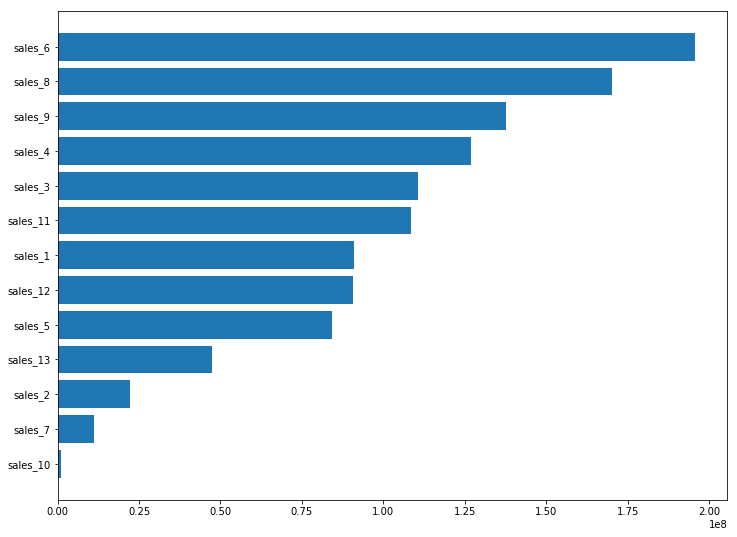

In [121]:
comission_by_sales=dataset.groupby('sales')['commision_1'].sum().sort_values().to_frame().reset_index()
plt.barh(comission_by_sales['sales'], comission_by_sales['commision_1'])

In [83]:
comission_by_type=dataset.groupby('month')[['commision_1','commision_2','commision_3']].sum().reset_index()

Переменные: три типа комиссий
Цель: динамику комиссий в течение года, отследить сезонность, изменение спроса на разные услуги
График: График, хорошо показывает динамику во времени

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


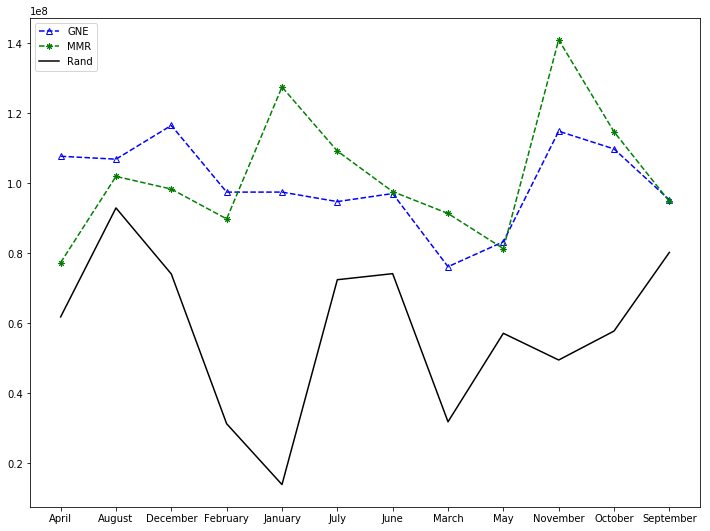

In [122]:
fig=plt.figure()
fig.show()
ax=fig.add_subplot(111)

ax.plot(comission_by_type.month,comission_by_type.commision_1,c='b',marker="^",ls='--',label='GNE',fillstyle='none')
ax.plot(comission_by_type.month,comission_by_type.commision_2,c='g',marker=(8,2,0),ls='--',label='MMR')
ax.plot(comission_by_type.month,comission_by_type.commision_3,c='k',ls='-',label='Rand')


plt.legend(loc=2)
plt.draw()

In [ ]:
Переменные: три типа комиссий
Цель: Понять характер данных, наличие выбросов
График: боксплот, показывает основные характеристика данных - интерквартильный размах, медиану, минимум и максимум

{'whiskers': [<matplotlib.lines.Line2D at 0x239620a7b38>,
 'caps': [<matplotlib.lines.Line2D at 0x239620b0438>,
 'boxes': [<matplotlib.lines.Line2D at 0x239620a79e8>,
 'medians': [<matplotlib.lines.Line2D at 0x239620b0c88>,
 'fliers': [<matplotlib.lines.Line2D at 0x239620b80f0>,
 'means': []}

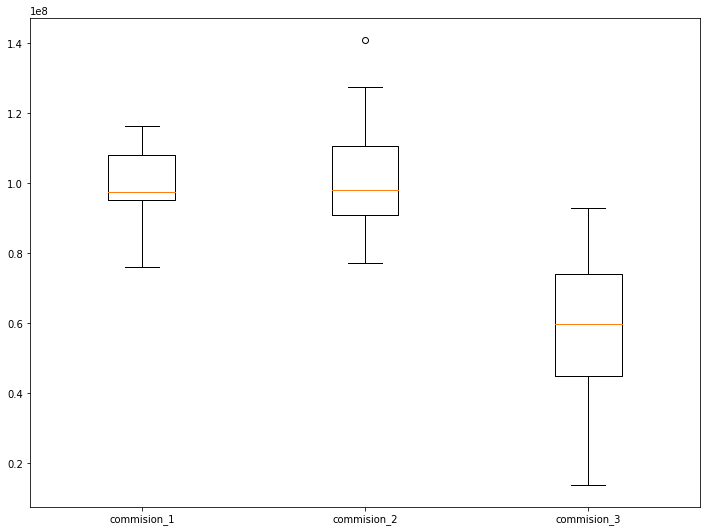

In [123]:
plt.boxplot((comission_by_type['commision_1'], comission_by_type['commision_2'], comission_by_type['commision_3'])
            ,labels=["commision_1", "commision_2", "commision_3"])

In [ ]:
Переменные: менеджеры, кол-во новых клиентов
Цель: Составить рейтинг по привлеченных клиентам
График: Еще один вариант линейчатой диаграммы, хорошо отражает показатели относительно друг друга

In [124]:
top_sales_new_clients = dataset.groupby(["sales"])[[ "count_new_clients"]].sum().sort_values("count_new_clients", ascending = False)

top_sales_new_clients.style.bar()

,count_new_clients
sales,
sales_9,75150
sales_13,4697
sales_11,1944
sales_1,995
sales_4,756
sales_8,718
sales_3,673
sales_2,578
sales_12,544


In [ ]:
Переменные: три типа комиссий, кол-во клиентов
Цель: Понять, есть ли зависимость от кол-ва клиентов
График: Paip plot, в одной визуализации позволяет понять, есть ли зависимость между переменными

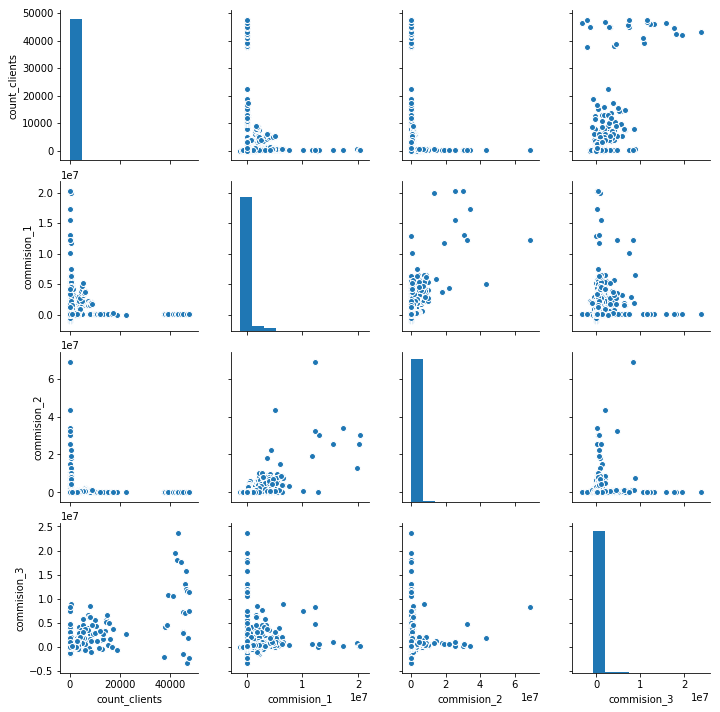

In [125]:
sns_plot = sns.pairplot(
    dataset[['count_clients','commision_1','commision_2','commision_3']])
sns_plot

In [ ]:
Переменные: комиссия, тип клиента, месяц
Цель: Выделить клиентов, которые приносят большую часть дохода в каждом месяце
График: Столбчатая диаграмма позволяет сравнить внутри каждого месяца и визуально понять рейтинг внутри периода

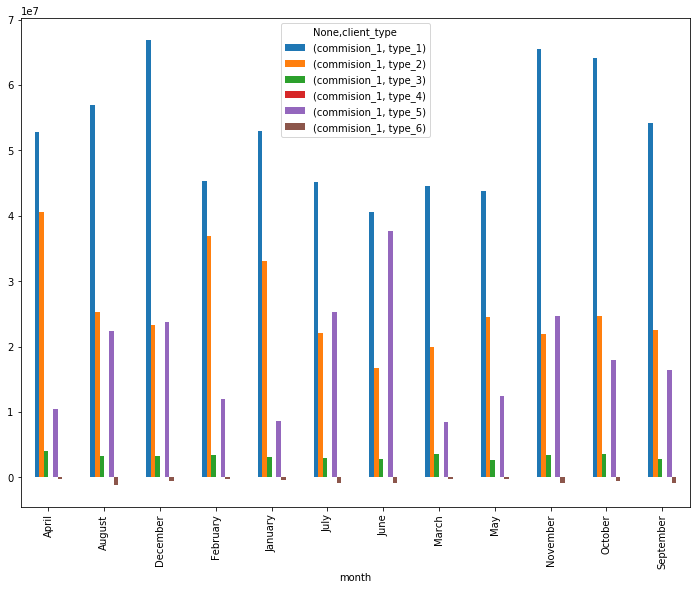

In [126]:
dataset.groupby(['month','client_type'])[['commision_1']].sum().unstack().plot(kind='bar')